In [20]:
def moving_average(file, window_num, original=bool):
    import matplotlib.pyplot as plt
    import matplotlib.font_manager as fm
    import bottleneck as bn
    import numpy as np
    import pandas as pd
    import warnings
    warnings.filterwarnings(action='ignore')

    file = pd.read_excel(file)

    # Handling Korean Font Error
    path = 'C:/Windows/Fonts/malgun.ttf'
    font_name = fm.FontProperties(fname=path, size=15).get_name()
    plt.rc('font', family=font_name)


    # extract variables    
    years = file["year"]
    precip = file["precip(mm)"]

    
    # framework
    plt.figure(figsize=(10, 5))
    plt.grid(True)

    
    # caculate & plot moving average
    window_num = int(window_num)
    ma5y = bn.move_mean(precip, window=window_num, min_count = None)
    
    # find missing value
    # whereisnan = np.isnan(ma5y)
    # print(whereisnan)

    ma5y_ = ma5y[window_num-1:]
    # print(ma5y_)
    years_ = np.array(years[window_num-1:])
    # print(years_)
    
    plt.plot(years_, ma5y_, linewidth=3, marker="o", label="이동평균")

    
    # plot trend line for moving average    
    z = np.polyfit(years_, ma5y_, 1)
    p = np.poly1d(z)
    plt.plot(years_, p(years_), "r--", color="red", label="추세선")
    plt.xlim(1981, 2020)
    
  
    # if you want to draw original precip. data > original=True
    if original == True:
        plt.plot(years, precip, "--", linewidth=1, color="green", label="강수량")
    else:
        pass

    
    # set details
    plt.title("1981-2020 강수량 %s년 이동평균"%(window_num), fontsize=15, fontweight="bold")
    plt.xlabel("년도", fontsize=13, fontweight="bold")
    plt.ylabel("강수량 (mm)", fontsize=13, fontweight="bold")
    plt.legend(fontsize=13)

    plt.show()

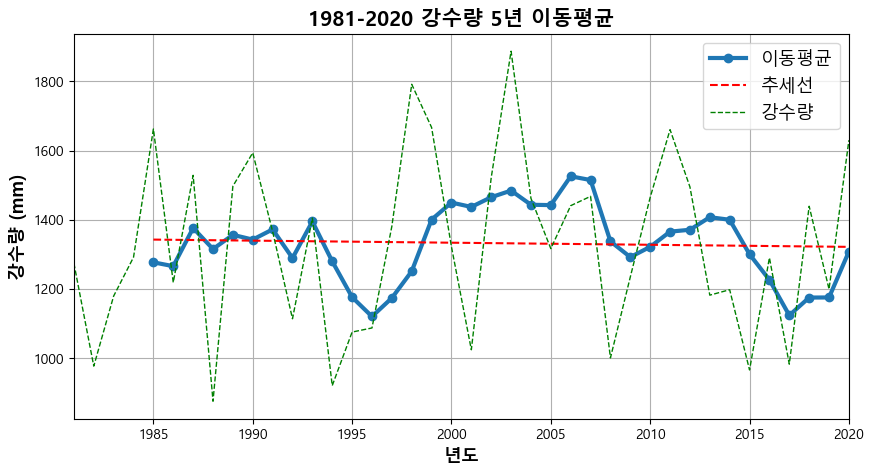

In [22]:
file = "1981_2020_total_precip.xlsx"
moving_average(file, 5, True)